#Online retail customer dataset-RFM analysis

We have a transactional data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail. The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

The company wants to segment its customers and determine marketing strategies according to these segments

The dataset consists of the following attributes:

- `InvoiceNo`: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.

- `StockCode`: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.

- `Description`: Product (item) name. Nominal.

- `Quantity`: The quantities of each product (item) per transaction. Numeric.

- `InvoiceDate`: Invoice Date and time. Numeric, the day and time when each transaction was generated. The date-time format used here is `yyyy-mm-dd hh:mm:ss`

- `UnitPrice`: Unit price. Numeric, Product price per unit in pound sterling, also known as GBP (Great Britain Pound).

- `CustomerID`: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.

- `Country`: Country name. Nominal, the name of the country where each customer resides.



**Dataset Credits:** https://archive.ics.uci.edu/ml/datasets/online+retail

**Citation:** Dr Daqing Chen, Director: Public Analytics group. chend '@' lsbu.ac.uk, School of Engineering, London South Bank University, London SE1 0AA, UK.

In [3]:
url="https://docs.google.com/spreadsheets/d/1yGxraWSt7XSsLJJp7datWmbR0f3FEg4t/export?format=xlsx"


In [5]:
import pandas as pd
df=pd.read_excel(url)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [6]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [10]:
df = df[df['InvoiceNo'].str.contains('C',na=False)]


In [11]:
df['InvoiceNo'] = df['InvoiceNo'].str.replace('C', '', regex=True).astype(int)
print(df)

        InvoiceNo StockCode                       Description  Quantity  \
141        536379         D                          Discount        -1   
154        536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235        536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236        536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237        536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   
...           ...       ...                               ...       ...   
540449     581490     23144   ZINC T-LIGHT HOLDER STARS SMALL       -11   
541541     581499         M                            Manual        -1   
541715     581568     21258        VICTORIAN SEWING BOX LARGE        -5   
541716     581569     84978  HANGING HEART JAR T-LIGHT HOLDER        -1   
541717     581569     20979     36 PENCILS TUBE RED RETROSPOT        -5   

               InvoiceDate  UnitPrice  CustomerID         Country  
141    2010-12-01 09:41:00     

/tmp/ipykernel_42121/2232263476.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvoiceNo'] = df['InvoiceNo'].str.replace('C', '', regex=True).astype(int)


In [13]:
df['CustomerID'].isnull().mean()*100

4.123600344530577

In [14]:
df=df.dropna(subset=['CustomerID'])

In [16]:
df['CustomerID'].isnull().mean()*100

0.0

In [18]:
df['CustomerID'] = df['CustomerID'].astype("int").astype('category')

/tmp/ipykernel_42121/1897184235.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CustomerID'] = df['CustomerID'].astype("int").astype('category')


In [20]:
recency = df[['CustomerID','InvoiceDate']].groupby(by='CustomerID',as_index=False).max()
recency

/tmp/ipykernel_42121/4224199788.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  recency = df[['CustomerID','InvoiceDate']].groupby(by='CustomerID',as_index=False).max()


,CustomerID,InvoiceDate
0,12346,2011-01-18 10:17:00
1,12352,2011-03-22 16:07:00
2,12359,2011-12-02 11:21:00
3,12362,2011-11-28 14:55:00
4,12365,2011-02-21 14:02:00
...,...,...
1584,18272,2011-05-11 09:49:00
1585,18274,2011-11-22 10:18:00
1586,18276,2011-11-18 17:01:00
1587,18277,2011-01-25 12:34:00


In [21]:
df.shape

(8905, 8)

In [22]:
last_day =  df['InvoiceDate'].max()
ref_date = last_day + pd.Timedelta("1 day")
ref_date

Timestamp('2011-12-10 11:58:00')

In [23]:
rec = (last_day-recency["InvoiceDate"]).dt.days
rec

0       325
1       261
2         7
3        10
4       290
       ... 
1584    212
1585     17
1586     20
1587    317
1588    121
Name: InvoiceDate, Length: 1589, dtype: int64

In [33]:
#How many
frequency = df[['CustomerID','InvoiceNo']].groupby(by='CustomerID',as_index=False).count()
frequency.rename(columns={'InvoiceNo':'frequency'})

/tmp/ipykernel_42121/464661616.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  frequency = df[['CustomerID','InvoiceNo']].groupby(by='CustomerID',as_index=False).count()


,CustomerID,frequency
0,12346,1
1,12352,10
2,12359,6
3,12362,8
4,12365,1
...,...,...
1584,18272,4
1585,18274,11
1586,18276,2
1587,18277,1


In [29]:
df['Total Price']= df['Quantity']*df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total Price
141,536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom,-27.50
154,536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom,-4.65
235,536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom,-19.80
236,536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom,-6.96
237,536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom,-6.96


In [30]:
monetary = df[['CustomerID','Total Price']].groupby(by='CustomerID',as_index=False).sum()
monetary

/tmp/ipykernel_42121/3002976353.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monetary = df[['CustomerID','Total Price']].groupby(by='CustomerID',as_index=False).sum()


,CustomerID,Total Price
0,12346,-77183.60
1,12352,-960.63
2,12359,-127.05
3,12362,-71.65
4,12365,-320.69
...,...,...
1584,18272,-13.80
1585,18274,-175.92
1586,18276,-12.50
1587,18277,-12.75


In [34]:
frequency['Monetary']=monetary['Total Price']
frequency['Recency']= rec
frequency.head()

,CustomerID,InvoiceNo,Monetary,Recency
0,12346,1,-77183.60,325
1,12352,10,-960.63,261
2,12359,6,-127.05,7
3,12362,8,-71.65,10
4,12365,1,-320.69,290


In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot: xlabel='Recency'>

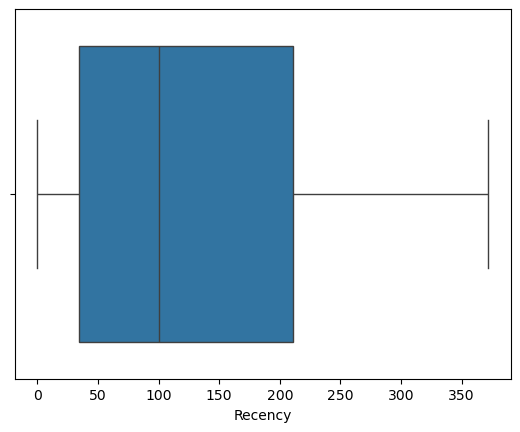

In [37]:
sns.boxplot(x=frequency['Recency'])

<AxesSubplot: ylabel='Monetary'>

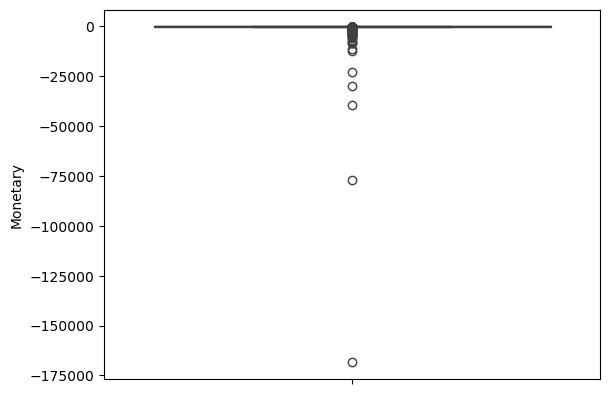

In [39]:
sns.boxplot(y=frequency['Monetary'])

In [ ]:
df_new = frequency
def remove_outliers(df,col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1

    lower = q1 - 1.5*iqr
    upper= q3 + 1.5*iqr

    return df[(df[col]>=lower)& (df[col]<=upper)]

df_new = remove_outliers(df_new,'Monetary')
df_new

,CustomerID,InvoiceNo,Monetary,Recency
2,12359,6,-127.05,7
3,12362,8,-71.65,10
5,12375,1,-2.08,2
6,12379,1,-1.95,155
7,12380,1,-4.25,45
...,...,...,...,...
1584,18272,4,-13.80,212
1585,18274,11,-175.92,17
1586,18276,2,-12.50,20
1587,18277,1,-12.75,317


In [44]:
df_new = remove_outliers(df_new,'Recency')
df_new

,CustomerID,InvoiceNo,Monetary,Recency
2,12359,6,-127.05,7
3,12362,8,-71.65,10
5,12375,1,-2.08,2
6,12379,1,-1.95,155
7,12380,1,-4.25,45
...,...,...,...,...
1584,18272,4,-13.80,212
1585,18274,11,-175.92,17
1586,18276,2,-12.50,20
1587,18277,1,-12.75,317
